## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

### Setting up data

In [5]:
#read in data
data = pd.read_csv('../data/train_clean.csv', index_col='respondent_id')

In [6]:
data.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,no_response,no_response,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,no_response,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,no_response,no_response,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [7]:
data.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

In [8]:
data.shape

(26707, 37)

In [9]:
data.isnull().sum()

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

In [16]:
data.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1                object
doctor_recc_seasonal            object
chronic_med_condition           object
child_under_6_months           float64
health_worker                   object
health_insurance                object
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

In [20]:
cols = list(data.select_dtypes('object').columns)

In [23]:
cols

['doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'health_worker',
 'health_insurance',
 'age_group',
 'education',
 'race',
 'sex',
 'income_poverty',
 'marital_status',
 'rent_or_own',
 'employment_status',
 'hhs_geo_region',
 'census_msa',
 'employment_industry',
 'employment_occupation']

In [27]:
data = pd.get_dummies(data=data, columns=cols, drop_first=True)

In [48]:
data.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,child_under_6_months,...,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,1,0,0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
#Set up variables
X = data.drop(columns=['h1n1_vaccine', 'seasonal_vaccine'])
y_h1n1 = data['h1n1_vaccine']
y_szn = data['seasonal_vaccine']

In [50]:
#Setting up pipelines and parameters
pipe_log = Pipeline([
    ('log', LogisticRegression(max_iter=5000))
])

pipe_mnb = Pipeline([
    ('mnb', MultinomialNB())
])

pipe_knn = Pipeline([
    ('knn', KNeighborsClassifier())
])

pipe_rfc = Pipeline([
    ('rfc', RandomForestClassifier())
])

log_par = {
    'log__C': [1, 0.1, 0.01, 0.001],
    'log__solver': ['liblinear', 'lbfgs']
}

mnb_par = {
}

knn_par = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2],
}
    
rfc_par = {
    'rfc__n_estimators': [50, 100, 150, 200],
    'rfc__max_depth': [None, 1, 2, 3, 4, 5],
    'rfc__max_features': [6, 8, 10]
}

### Models for Seasonal Flu

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y_szn, random_state=42, stratify = y_szn)

In [52]:
gsl = GridSearchCV(pipe_log, param_grid = log_par, n_jobs = -1, cv = 3)

In [53]:
gsl.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('log',
                                        LogisticRegression(max_iter=5000))]),
             n_jobs=-1,
             param_grid={'log__C': [1, 0.1, 0.01, 0.001],
                         'log__solver': ['liblinear', 'lbfgs']})

In [54]:
gsm = GridSearchCV(pipe_mnb, param_grid = mnb_par, n_jobs = -1, cv = 3)

In [55]:
gsm.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Pipeline(steps=[('mnb', MultinomialNB())]),
             n_jobs=-1, param_grid={})

In [56]:
gsk = GridSearchCV(pipe_knn, param_grid = knn_par, n_jobs = -1, cv = 3)

In [57]:
gsk.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Pipeline(steps=[('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': [3, 5, 7, 9], 'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']})

In [58]:
gsr = GridSearchCV(pipe_rfc, param_grid = rfc_par, n_jobs = -1, cv = 3)

In [59]:
gsr.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('rfc', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rfc__max_depth': [None, 1, 2, 3, 4, 5],
                         'rfc__max_features': [6, 8, 10],
                         'rfc__n_estimators': [50, 100, 150, 200]})

In [86]:
from sklearn.metrics import roc_auc_score

In [60]:
gsl.score(X_train, y_train), gsl.score(X_test, y_test)

(0.7831253120319521, 0.7787928710498727)

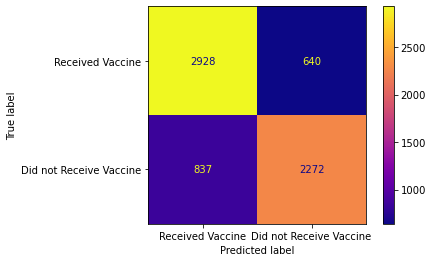

In [61]:
plot_confusion_matrix(gsl, X_test, y_test, display_labels=['Received Vaccine', 'Did not Receive Vaccine'], cmap = 'plasma');

In [63]:
gsm.score(X_train, y_train), gsm.score(X_test, y_test)

(0.7169246130803795, 0.7158903699266137)

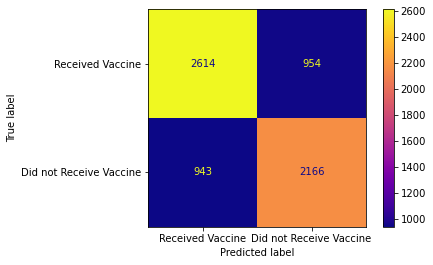

In [64]:
plot_confusion_matrix(gsm, X_test, y_test, display_labels=['Received Vaccine', 'Did not Receive Vaccine'], cmap = 'plasma');

In [65]:
gsk.score(X_train, y_train), gsk.score(X_test, y_test)

(0.7897653519720419, 0.742998352553542)

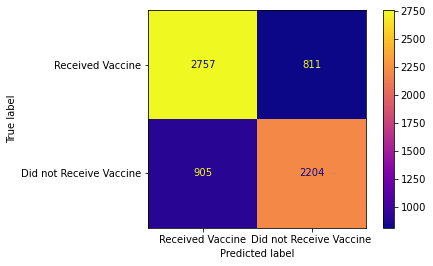

In [66]:
plot_confusion_matrix(gsk, X_test, y_test, display_labels=['Received Vaccine', 'Did not Receive Vaccine'], cmap = 'plasma');

In [67]:
gsr.score(X_train, y_train), gsr.score(X_test, y_test)

(1.0, 0.7765463531526134)

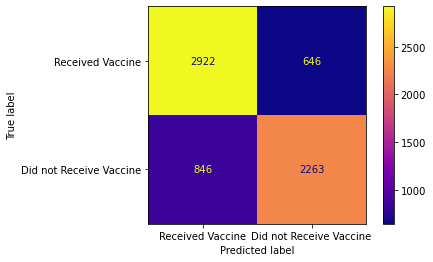

In [68]:
plot_confusion_matrix(gsr, X_test, y_test, display_labels=['Received Vaccine', 'Did not Receive Vaccine'], cmap = 'plasma');

### Same models but for H1N1

In [69]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y_h1n1, random_state=42, stratify = y_h1n1)

In [70]:
gsl2 = GridSearchCV(pipe_log, param_grid = log_par, n_jobs = -1, cv = 3)

In [71]:
gsl2.fit(X_train2, y_train2)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('log',
                                        LogisticRegression(max_iter=5000))]),
             n_jobs=-1,
             param_grid={'log__C': [1, 0.1, 0.01, 0.001],
                         'log__solver': ['liblinear', 'lbfgs']})

In [72]:
gsm2 = GridSearchCV(pipe_mnb, param_grid = mnb_par, n_jobs = -1, cv = 3)

In [73]:
gsm2.fit(X_train2, y_train2)

GridSearchCV(cv=3, estimator=Pipeline(steps=[('mnb', MultinomialNB())]),
             n_jobs=-1, param_grid={})

In [74]:
gsk2 = GridSearchCV(pipe_knn, param_grid = knn_par, n_jobs = -1, cv = 3)

In [75]:
gsk2.fit(X_train2, y_train2)

GridSearchCV(cv=3, estimator=Pipeline(steps=[('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': [3, 5, 7, 9], 'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']})

In [76]:
gsr2 = GridSearchCV(pipe_rfc, param_grid = rfc_par, n_jobs = -1, cv = 3)

In [77]:
gsr2.fit(X_train2, y_train2)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('rfc', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rfc__max_depth': [None, 1, 2, 3, 4, 5],
                         'rfc__max_features': [6, 8, 10],
                         'rfc__n_estimators': [50, 100, 150, 200]})

In [78]:
gsl2.score(X_train2, y_train2), gsl2.score(X_test2, y_test2)

(0.854618072890664, 0.8475363187060057)

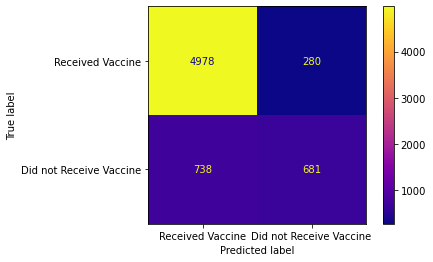

In [79]:
plot_confusion_matrix(gsl2, X_test2, y_test2, display_labels=['Received Vaccine', 'Did not Receive Vaccine'], cmap = 'plasma');

In [80]:
gsm2.score(X_train2, y_train2), gsm2.score(X_test2, y_test2)

(0.8207189216175736, 0.8184813539014527)

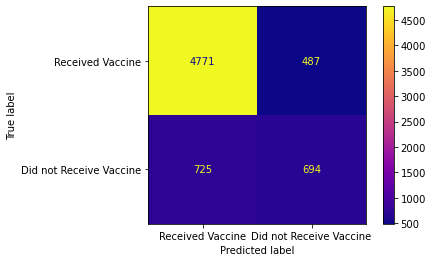

In [81]:
plot_confusion_matrix(gsm2, X_test2, y_test2, display_labels=['Received Vaccine', 'Did not Receive Vaccine'], cmap = 'plasma');

In [82]:
gsk2.score(X_train2, y_train2), gsk2.score(X_test2, y_test2)

(1.0, 0.8330088363037292)

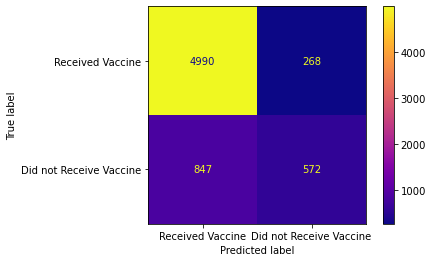

In [83]:
plot_confusion_matrix(gsk2, X_test2, y_test2, display_labels=['Received Vaccine', 'Did not Receive Vaccine'], cmap = 'plasma');

In [84]:
gsr2.score(X_train2, y_train2), gsr2.score(X_test2, y_test2)

(1.0, 0.8499326044630823)

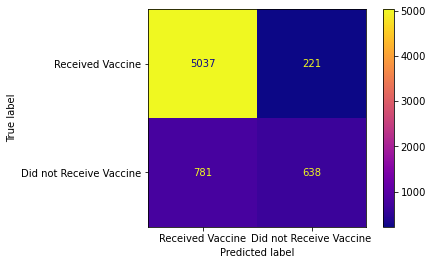

In [85]:
plot_confusion_matrix(gsr2, X_test2, y_test2, display_labels=['Received Vaccine', 'Did not Receive Vaccine'], cmap = 'plasma');

### Pickling Models

In [87]:
import pickle

In [88]:
path = '../models/accuracy/'

In [101]:
def pickler(model, name, dir):
    with open(dir+f'{name}.pkl', 'wb') as pickle_out:
        pickle_out = pickle.dump(model, pickle_out)

In [102]:
pickler(gsl, 'logreg_seasonal_acc', path)

In [103]:
pickler(gsm, 'mnb_seasonal_acc', path)

In [104]:
pickler(gsk, 'knn_seasonal_acc', path)

In [105]:
pickler(gsr, 'rfc_seasonal_acc', path)

In [106]:
pickler(gsl2, 'logreg_h1n1_acc', path)

In [107]:
pickler(gsm2, 'mnb_h1n1_acc', path)

In [108]:
pickler(gsk2, 'knn_h1n1_acc', path)

In [109]:
pickler(gsr2, 'rfc_h1n1_acc', path)

In [ ]:
git commit -m 'early pipeline and gridsearch and model pickling'
